In [53]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pulp import *
import seaborn as sn

In [54]:
df=pd.read_csv('../../../Datasets/cop_data.csv')
df.head()

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Latitude,Longitude,ObjectId
0,-77.607990,43.183680,d981912bde17ff11baeec440d2962c55,20-180265,1010 Joseph Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,M,BLACK,NON HISPANIC,23,15-24,43.183680,-77.607990,1
1,-77.643147,43.141723,9aed9ae5ee7f83638ee33ccff49cf6b9,20-180404,294 Rugby Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,F,BLACK,NON HISPANIC,28,25-44,43.141723,-77.643147,2
2,-77.611200,43.178448,b0c3f83c934aeea9486ccc2362e0cee6,20-179396,77 Ketchum St,2020/08/08 04:00:00+00,8,2020,Shooting,No,M,WHITE,NON HISPANIC,49,45-Older,43.178448,-77.611200,3
3,-77.613357,43.168276,b83cd8b57bb9048cca4830620cbfab07,20-179526,123 Upper Falls Blvd,2020/08/08 04:00:00+00,8,2020,Shooting,No,M,BLACK,NON HISPANIC,23,15-24,43.168276,-77.613357,4
4,-77.589725,43.181775,42bb767348c1f8a5e4c085b67ab14732,20-177327,334 Roycroft Dr,2020/08/06 04:00:00+00,8,2020,Shooting,Yes,M,BLACK,NON HISPANIC,22,15-24,43.181775,-77.589725,5


In [55]:
df['Latitude']

0      43.183680
1      43.141723
2      43.178448
3      43.168276
4      43.181775
         ...    
192    43.186527
193    43.177847
194    43.163797
195    43.177547
196    43.151774
Name: Latitude, Length: 197, dtype: float64

In [56]:
df['Longitude']

0     -77.607990
1     -77.643147
2     -77.611200
3     -77.613357
4     -77.589725
         ...    
192   -77.603529
193   -77.638011
194   -77.580387
195   -77.584300
196   -77.629139
Name: Longitude, Length: 197, dtype: float64

In [57]:
df.shape

(197, 18)

In [58]:
import haversine as hs
from haversine import Unit

In [59]:

df['coordinate'] = list(zip(df['Latitude'],df['Longitude']))
df.head()

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Latitude,Longitude,ObjectId,coordinate
0,-77.607990,43.183680,d981912bde17ff11baeec440d2962c55,20-180265,1010 Joseph Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,M,BLACK,NON HISPANIC,23,15-24,43.183680,-77.607990,1,"(43.1836795360001, -77.607990462)"
1,-77.643147,43.141723,9aed9ae5ee7f83638ee33ccff49cf6b9,20-180404,294 Rugby Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,F,BLACK,NON HISPANIC,28,25-44,43.141723,-77.643147,2,"(43.14172340100001, -77.643147095)"
2,-77.611200,43.178448,b0c3f83c934aeea9486ccc2362e0cee6,20-179396,77 Ketchum St,2020/08/08 04:00:00+00,8,2020,Shooting,No,M,WHITE,NON HISPANIC,49,45-Older,43.178448,-77.611200,3,"(43.1784481240001, -77.6112000269999)"
3,-77.613357,43.168276,b83cd8b57bb9048cca4830620cbfab07,20-179526,123 Upper Falls Blvd,2020/08/08 04:00:00+00,8,2020,Shooting,No,M,BLACK,NON HISPANIC,23,15-24,43.168276,-77.613357,4,"(43.16827618399999, -77.61335654399991)"
4,-77.589725,43.181775,42bb767348c1f8a5e4c085b67ab14732,20-177327,334 Roycroft Dr,2020/08/06 04:00:00+00,8,2020,Shooting,Yes,M,BLACK,NON HISPANIC,22,15-24,43.181775,-77.589725,5,"(43.181775168000094, -77.589725243)"


In [60]:
def dist_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [61]:
# parse location one by one to dist_from
for _,row in df.iterrows():
    df[row.ID]=df['coordinate'].apply(lambda x: dist_from(row.coordinate,x))

In [62]:
df.head()

,X,Y,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,...,9dd727a9a134ee857bbc92ee73fa9e67,c00ef42f9bc13a9d3d4addf8c686eeda,be2f1f80383ec282b766f31c8816c13c,68fb4ce4b6f5aab961d6ec93dfc0243d,e3deca0e1436afa896af4c32ff8b331b,25baf3637287b913da75ce7a82c02e76,e7e65cbf4cbea4fb5a4b84213e4bff7c,f9fc4e2caadd80ba41912e99a4198db3,756cd79a8fb43560d781eb216e430d4d,1f67441c2eae1d31776b1c961eb74d82
0,-77.607990,43.183680,d981912bde17ff11baeec440d2962c55,20-180265,1010 Joseph Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,...,2.39,2.39,0.41,3.74,0.48,0.48,2.52,3.15,2.04,3.94
1,-77.643147,43.141723,9aed9ae5ee7f83638ee33ccff49cf6b9,20-180404,294 Rugby Ave,2020/08/09 04:00:00+00,8,2020,Shooting,No,...,3.78,3.78,5.07,1.87,5.93,5.93,4.04,5.65,6.22,1.59
2,-77.611200,43.178448,b0c3f83c934aeea9486ccc2362e0cee6,20-179396,77 Ketchum St,2020/08/08 04:00:00+00,8,2020,Shooting,No,...,1.86,1.86,0.28,3.11,1.09,1.09,2.18,2.98,2.18,3.30
3,-77.613357,43.168276,b83cd8b57bb9048cca4830620cbfab07,20-179526,123 Upper Falls Blvd,2020/08/08 04:00:00+00,8,2020,Shooting,No,...,0.90,0.90,1.42,2.01,2.18,2.18,2.26,2.72,2.57,2.24
4,-77.589725,43.181775,42bb767348c1f8a5e4c085b67ab14732,20-177327,334 Roycroft Dr,2020/08/06 04:00:00+00,8,2020,Shooting,Yes,...,2.55,2.55,1.76,4.36,1.24,1.24,3.94,2.14,0.64,4.62


In [63]:
distances_df=df.iloc[:,19:4183]
#distances_df.index=df.ID
distances_df.insert(0, 'ID', df.ID)

distances_df

,ID,d981912bde17ff11baeec440d2962c55,9aed9ae5ee7f83638ee33ccff49cf6b9,b0c3f83c934aeea9486ccc2362e0cee6,b83cd8b57bb9048cca4830620cbfab07,42bb767348c1f8a5e4c085b67ab14732,a8c5e088b79b16709df3ce1589438e4b,1642e9ea9f20bc6c190560580241ad24,7c4ff4e2a92a48af3a1bebb390a4fdbc,5e631196f8d60399474687757b4fe570,...,9dd727a9a134ee857bbc92ee73fa9e67,c00ef42f9bc13a9d3d4addf8c686eeda,be2f1f80383ec282b766f31c8816c13c,68fb4ce4b6f5aab961d6ec93dfc0243d,e3deca0e1436afa896af4c32ff8b331b,25baf3637287b913da75ce7a82c02e76,e7e65cbf4cbea4fb5a4b84213e4bff7c,f9fc4e2caadd80ba41912e99a4198db3,756cd79a8fb43560d781eb216e430d4d,1f67441c2eae1d31776b1c961eb74d82
0,d981912bde17ff11baeec440d2962c55,0.00,5.47,0.64,1.77,1.50,1.50,6.37,5.22,2.73,...,2.39,2.39,0.41,3.74,0.48,0.48,2.52,3.15,2.04,3.94
1,9aed9ae5ee7f83638ee33ccff49cf6b9,5.47,0.00,4.84,3.82,6.21,6.21,2.88,0.58,5.92,...,3.78,3.78,5.07,1.87,5.93,5.93,4.04,5.65,6.22,1.59
2,b0c3f83c934aeea9486ccc2362e0cee6,0.64,4.84,0.00,1.14,1.78,1.78,5.77,4.61,2.67,...,1.86,1.86,0.28,3.11,1.09,1.09,2.18,2.98,2.18,3.30
3,b83cd8b57bb9048cca4830620cbfab07,1.77,3.82,1.14,0.00,2.43,2.43,4.64,3.66,2.65,...,0.90,0.90,1.42,2.01,2.18,2.18,2.26,2.72,2.57,2.24
4,42bb767348c1f8a5e4c085b67ab14732,1.50,6.21,1.78,2.43,0.00,0.00,6.45,6.09,1.57,...,2.55,2.55,1.76,4.36,1.24,1.24,3.94,2.14,0.64,4.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,25baf3637287b913da75ce7a82c02e76,0.48,5.93,1.09,2.18,1.24,1.24,6.72,5.70,2.66,...,2.71,2.71,0.89,4.18,0.00,0.00,2.96,3.15,1.85,4.39
193,e7e65cbf4cbea4fb5a4b84213e4bff7c,2.52,4.04,2.18,2.26,3.94,3.94,6.01,3.59,4.74,...,3.13,3.13,2.18,2.99,2.96,2.96,0.00,4.93,4.36,2.99
194,f9fc4e2caadd80ba41912e99a4198db3,3.15,5.65,2.98,2.72,2.14,2.14,4.97,5.73,0.61,...,2.08,2.08,3.16,3.87,3.15,3.15,4.93,0.00,1.56,4.17
195,756cd79a8fb43560d781eb216e430d4d,2.04,6.22,2.18,2.57,0.64,0.64,6.17,6.15,0.96,...,2.45,2.45,2.23,4.35,1.85,1.85,4.36,1.56,0.00,4.63


In [64]:
dist_dict={}

In [65]:
#positions to be plotted
locations = dict( ( ID, (df[['ID','Latitude','Longitude']].loc[ID, 'Longitude'], df[['ID','Latitude','Longitude']].loc[ID, 'Latitude']) ) for ID in df.index)
locations

{0: (-77.607990462, 43.1836795360001),
 1: (-77.643147095, 43.14172340100001),
 2: (-77.6112000269999, 43.1784481240001),
 3: (-77.61335654399991, 43.16827618399999),
 4: (-77.589725243, 43.181775168000094),
 5: (-77.589725243, 43.181775168000094),
 6: (-77.61434480299991, 43.1265908730001),
 7: (-77.646771838, 43.146168239000104),
 8: (-77.58069826399999, 43.169300143),
 9: (-77.648424429, 43.179133138999994),
 10: (-77.648424429, 43.179133138999994),
 11: (-77.609300162, 43.172693386999995),
 12: (-77.6181375, 43.181900602),
 13: (-77.57671490000001, 43.1743530630001),
 14: (-77.631833797, 43.1433883),
 15: (-77.595770895, 43.1544642540001),
 16: (-77.595588417, 43.156761798999995),
 17: (-77.60174147899991, 43.167496503000095),
 18: (-77.59942248399992, 43.1426986170001),
 19: (-77.63480384100001, 43.163456888),
 20: (-77.6016568699999, 43.166956576000096),
 21: (-77.63381348199991, 43.159657866),
 22: (-77.639068223, 43.1495552480001),
 23: (-77.629324546, 43.143230190000104),
 24:

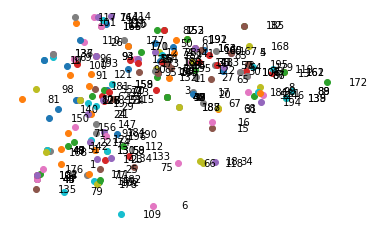

In [66]:
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
plt.gca().axis('off');

In [67]:

# get distance in a dictionary form
distances = dict( ((l1,l2), distances_df.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)


In [68]:
V = 3 #the number vehicles/people deployed

In [69]:
#problem
prob=LpProblem("vehicle", LpMinimize)

In [70]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [71]:
type(indicator)

dict

In [72]:
type(distances)

dict

In [73]:
#constraints
for v in df.ID:
    cap = 1 if v != '9aed9ae5ee7f83638ee33ccff49cf6b9' else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != '9aed9ae5ee7f83638ee33ccff49cf6b9' and j!= '9aed9ae5ee7f83638ee33ccff49cf6b9') and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [74]:
%time prob.solve()
print(LpStatus[prob.status])

CPU times: user 4.3 ms, sys: 6.98 ms, total: 11.3 ms
Wall time: 71.6 ms
Infeasible


In [75]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [76]:
routes = get_next_loc('9aed9ae5ee7f83638ee33ccff49cf6b9')
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !='9aed9ae5ee7f83638ee33ccff49cf6b9':
        r.append(get_next_loc(r[-1][1])[-1])

In [77]:
for r in routes:
    print(' -> '.join([ a for a,b in r]+['9aed9ae5ee7f83638ee33ccff49cf6b9']))

In [78]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], coloured_loc=co)

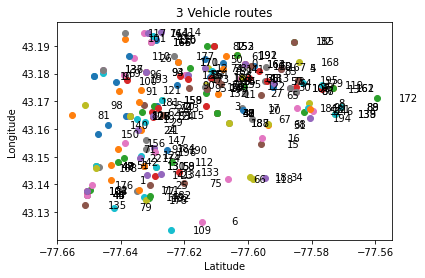

In [79]:
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()